In [102]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.optimize
from scipy.optimize import minimize
from scipy.special import jv
#from scipy.ndimage import gaussian_filter1d
import sys

import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

import qgm
from qgm import image, parameter, filter, data, fitting, function

from regions import PixCoord, RectanglePixelRegion, CirclePixelRegion

cmap = image.generate_cmap(['#330000', 'r', 'w'])

# n=1 and 2

In [103]:
date = '20221007'
dataNo = 1
scanNo = 2

In [104]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [105]:
param_name ='T0051: LS ramp up time  2nd (usec.)'
scan_param =scan_data[param_name]
unique_param = scan_param.unique()
flcount = scan_data['Total count @ ROI1 (arb. u.)']

In [106]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat.tiff'))
    update_files = list(Path(path_img).glob('seq*_update.tiff'))
else:
    print('No images')

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

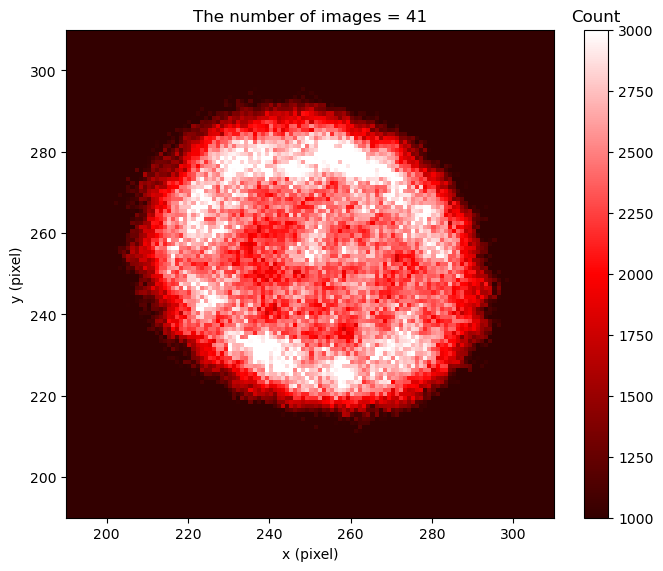

In [107]:
vmin = 1000
vmax = 3000
xlim_1 = 190
xlim_2 = 310
ylim_1 = 190
ylim_2 = 310

fig =plt.figure(figsize=[7,7],dpi=100)
ax1 = fig.add_subplot(1,1,1)
mappable =ax1.pcolormesh(img_trans_ave, cmap=cmap,vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("The number of images = %d"%(len(img_trans_list)))
ax1.set_xlabel("x (pixel)")
ax1.set_ylabel("y (pixel)")
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"Count", fontsize=12)
plt.savefig("MI_n1and2_ave.png")

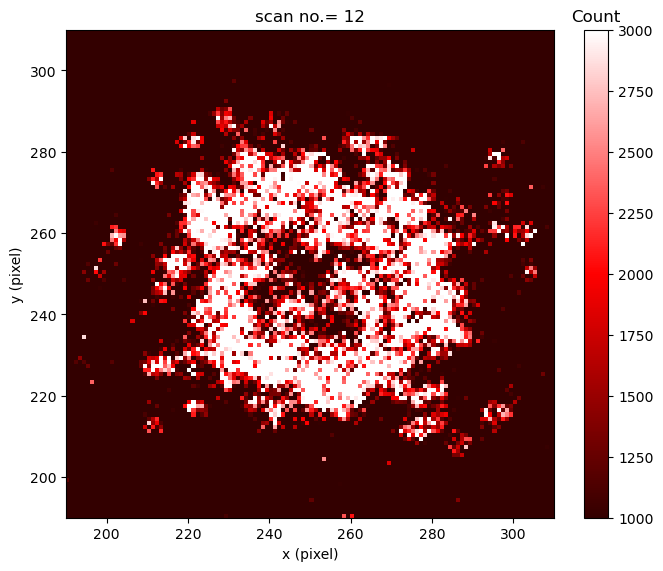

In [108]:
vmin = 1000
vmax = 3000
xlim_1 = 190
xlim_2 = 310
ylim_1 = 190
ylim_2 = 310

trans_index = 12
fig =plt.figure(figsize=[7,7],dpi=100)
ax1 = fig.add_subplot(1,1,1)
mappable =ax1.pcolormesh(img_trans_list[trans_index], cmap=cmap,vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("scan no.= %d"%(trans_index))
ax1.set_xlabel("x (pixel)")
ax1.set_ylabel("y (pixel)")
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"Count", fontsize=12)
plt.savefig("MI_n1and2_single.png")

# n = 1

In [109]:
date = '20221007'
dataNo = 2
scanNo = 3

In [110]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [111]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat.tiff'))
    update_files = list(Path(path_img).glob('seq*_update.tiff'))
else:
    print('No images')

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

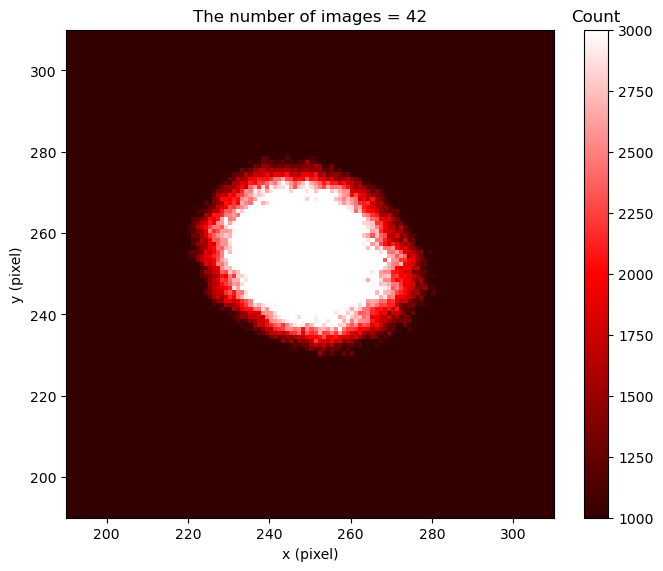

In [112]:
vmin = 1000
vmax = 3000
xlim_1 = 190
xlim_2 = 310
ylim_1 = 190
ylim_2 = 310

fig =plt.figure(figsize=[7,7],dpi=100)
ax1 = fig.add_subplot(1,1,1)
mappable =ax1.pcolormesh(img_trans_ave, cmap=cmap,vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("The number of images = %d"%(len(img_trans_list)))
ax1.set_xlabel("x (pixel)")
ax1.set_ylabel("y (pixel)")
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"Count", fontsize=12)
plt.savefig("MI_n1_ave.png")

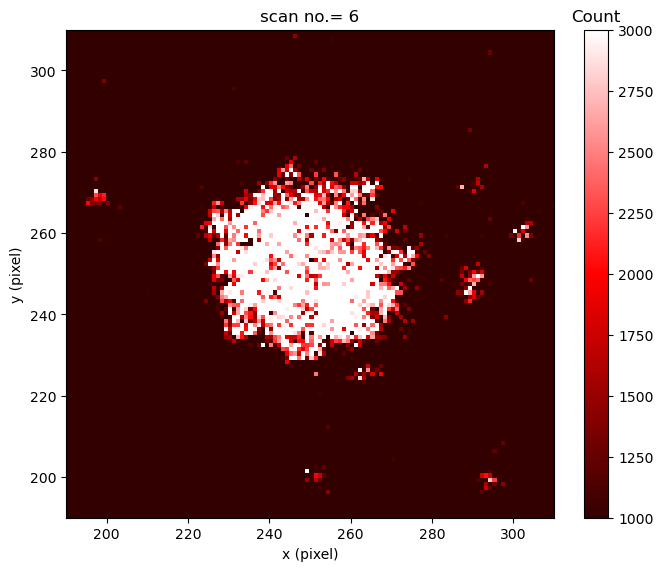

In [113]:
vmin = 1000
vmax = 3000
xlim_1 = 190
xlim_2 = 310
ylim_1 = 190
ylim_2 = 310

trans_index = 6
fig =plt.figure(figsize=[7,7],dpi=100)
ax1 = fig.add_subplot(1,1,1)
mappable =ax1.pcolormesh(img_trans_list[trans_index], cmap=cmap,vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("scan no.= %d"%(trans_index))
ax1.set_xlabel("x (pixel)")
ax1.set_ylabel("y (pixel)")
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"Count", fontsize=12)
plt.savefig("MI_n1_single.png")

# n = 1, 2, and 3

In [125]:
date = '20221007'
dataNo = 3
scanNo = 4

In [126]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [127]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat.tiff'))
    update_files = list(Path(path_img).glob('seq*_update.tiff'))
else:
    print('No images')

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

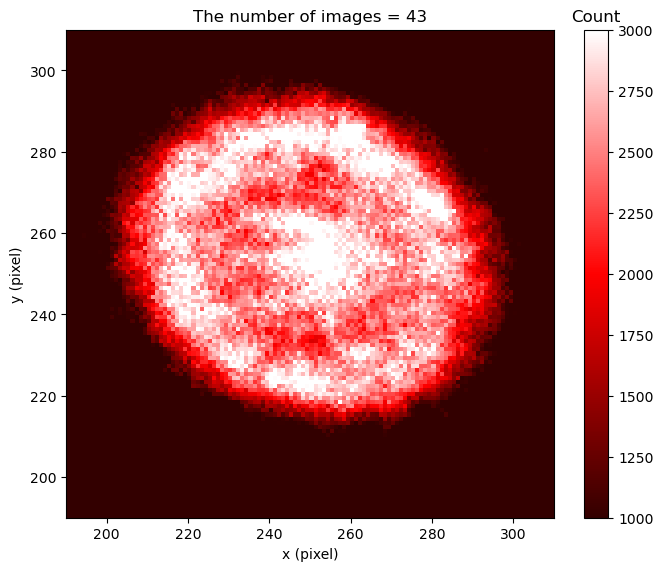

In [128]:
vmin = 1000
vmax = 3000
xlim_1 = 190
xlim_2 = 310
ylim_1 = 190
ylim_2 = 310

fig =plt.figure(figsize=[7,7],dpi=100)
ax1 = fig.add_subplot(1,1,1)
mappable =ax1.pcolormesh(img_trans_ave, cmap=cmap,vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("The number of images = %d"%(len(img_trans_list)))
ax1.set_xlabel("x (pixel)")
ax1.set_ylabel("y (pixel)")
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"Count", fontsize=12)
plt.savefig("MI_n1and2and3_ave.png")

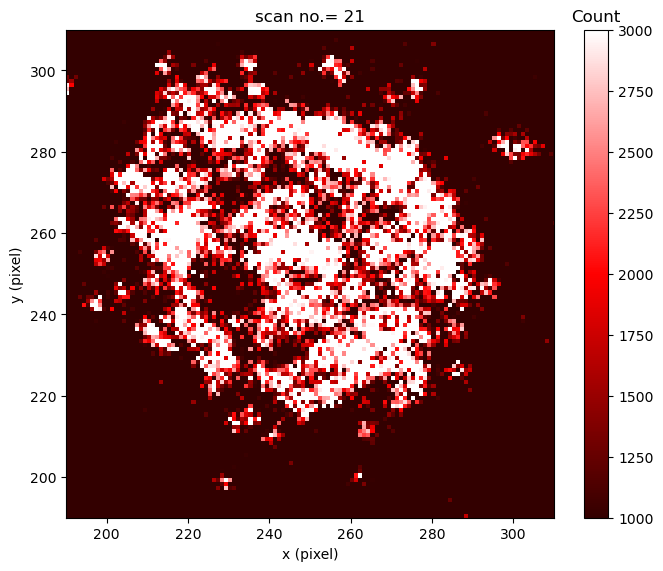

In [129]:
vmin = 1000
vmax = 3000
xlim_1 = 190
xlim_2 = 310
ylim_1 = 190
ylim_2 = 310

trans_index = 21
fig =plt.figure(figsize=[7,7],dpi=100)
ax1 = fig.add_subplot(1,1,1)
mappable =ax1.pcolormesh(img_trans_list[trans_index], cmap=cmap,vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("scan no.= %d"%(trans_index))
ax1.set_xlabel("x (pixel)")
ax1.set_ylabel("y (pixel)")
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"Count", fontsize=12)
plt.savefig("MI_n1and2and3_single.png")

# n=1 and 2 rev1

In [130]:
date = '20221007'
dataNo = 6
scanNo = 7

In [131]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

In [132]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat.tiff'))
    update_files = list(Path(path_img).glob('seq*_update.tiff'))
else:
    print('No images')

img_flat_ave =[]
img_trans_ave = []
img_trans_list = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
for N in range(len(trans_files)):
    img_trans_list += [np.array(Image.open(trans_files[N])) - img_flat_ave]

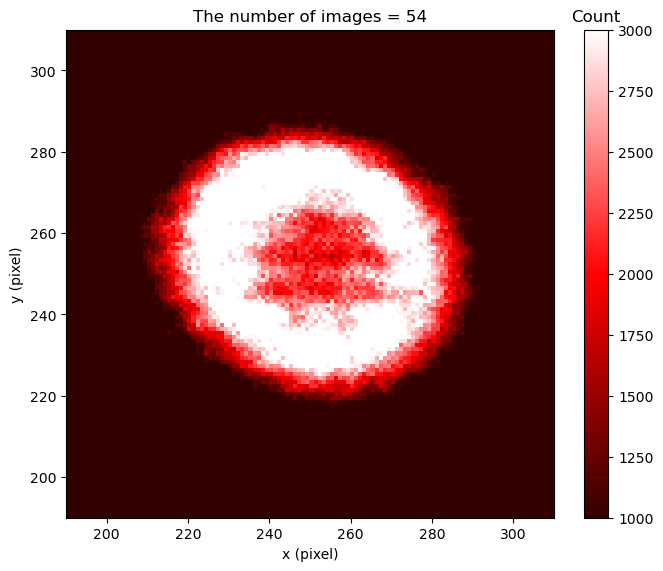

In [133]:
vmin = 1000
vmax = 3000
xlim_1 = 190
xlim_2 = 310
ylim_1 = 190
ylim_2 = 310

fig =plt.figure(figsize=[7,7],dpi=100)
ax1 = fig.add_subplot(1,1,1)
mappable =ax1.pcolormesh(img_trans_ave, cmap=cmap,vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("The number of images = %d"%(len(img_trans_list)))
ax1.set_xlabel("x (pixel)")
ax1.set_ylabel("y (pixel)")
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"Count", fontsize=12)
plt.savefig("MI_n1and2_rev1_ave.png")

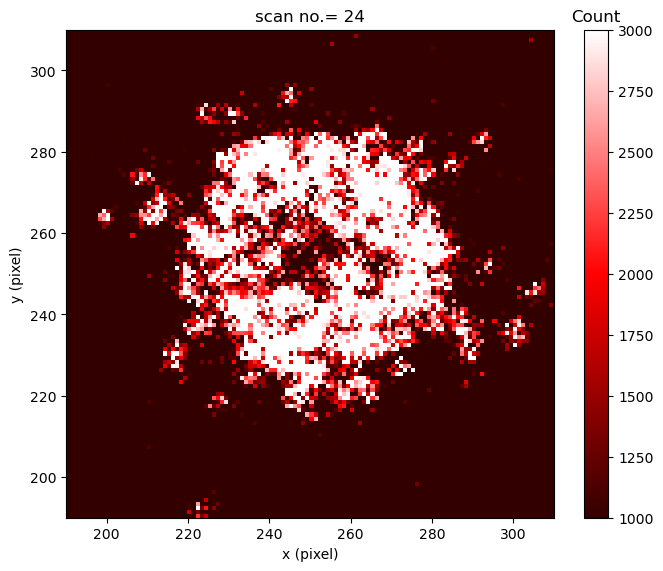

In [135]:
vmin = 1000
vmax = 3000
xlim_1 = 190
xlim_2 = 310
ylim_1 = 190
ylim_2 = 310

trans_index = 24
fig =plt.figure(figsize=[7,7],dpi=100)
ax1 = fig.add_subplot(1,1,1)
mappable =ax1.pcolormesh(img_trans_list[trans_index], cmap=cmap,vmin=vmin, vmax=vmax, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(xlim_1,xlim_2)
ax1.set_ylim(ylim_1,ylim_2)
ax1.set_title("scan no.= %d"%(trans_index))
ax1.set_xlabel("x (pixel)")
ax1.set_ylabel("y (pixel)")
divider1 = make_axes_locatable(ax1)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"Count", fontsize=12)
plt.savefig("MI_n1and2_rev1_single.png")